# Bollinger Bands Demo

[Bollinger Bands Definition](https://www.investopedia.com/terms/b/bollingerbands.asp)

First generate the 20-day SMA of the price.

Then calculate the 2 * std.dev above the SMA and 2 * std.dev below the SMA.

Note that the std.dev is calculated from the past 20 data points of the SMA(20)

In [1]:
# Reload notebook if libraries are edited. Display plots correctly.
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
# We also use the unittest library, which is imported in the testing cell.

## Simple Moving Average (SMA) Functions

In [3]:
# Calculates the average given a list of numbers.
def getAvg(data):
    total = 0
    i = 0
    while i < len(data):
        total = total + data[i]
        i = i + 1
    # Catch divide by zero errors.
    if i == 0: 
        return 0
    else:
        return total / i

    
# Produces a subset list given a list of numbers, the final 
#desired index, and the desired subset length.
def getMovingList(data, index, length):
    listEnd = index + 1
    listStart = index - length + 1
    result = data[listStart:listEnd]
    # Note that when index - length < -1, then the result will be [] (empty)
    return result


# Calculates a single average.
def getSingleSMA(data, index, sma_period):
    movingList = getMovingList(data, index, sma_period)
    average = getAvg(movingList)
    return average


# Calculates the entire list of averages.
def getSMAlist(data, sma_period):
    smaList = []
    i = 0
    while i < len(data):
        value = getSingleSMA(data, i, sma_period)
        smaList.append(value)
        i = i + 1
    return smaList


## Bollinger Bands Functions

In [4]:

def variance(nums):
    average = getAvg(nums)
    numerator = 0
    denominator = len(nums) - 1
    item = 0

    i = 0
    while i < len(nums):
        item = (nums[i]-average)**2
        numerator += item
        i += 1

    return numerator / denominator


def stddev(nums):
    return math.sqrt(variance(nums))

def stddev_list(data, period):
    # Initialize list with preceding zeros.
    sd_list = [0] * period
    i = period
    while i < len(data):
        value = stddev(getMovingList(data, i, period))
        sd_list.append(value)
        i += 1
    return sd_list

def getBOL(data, period, std_devs):
    # Upper Bollinger Band
    # Need to force the first period * 2 entries to be 0 for bolu, boll.
    sma_list = getSMAlist(data, period)
    sd_list = stddev_list(data, period)
    bolu = [0] * period * 2
    boll = [0] * period * 2
    i = period * 2
    while i < len(sma_list):
        value_upper = sma_list[i] + std_devs * sd_list[i]
        value_lower = sma_list[i] - std_devs * sd_list[i]
        bolu.append(value_upper)
        boll.append(value_lower)
        i += 1
    return sma_list, bolu, boll

## Plotting Function

In [5]:
# Plots 3 lines: raw data, SMA(period_1), SMA(period_2)
def calculateAndPlotSMA(data, sma_period_1, sma_period_2):
    sma_1 = getSMAlist(data, sma_period_1)
    sma_2 = getSMAlist(data, sma_period_2)
    x = np.arange(len(data))
    plt.plot(x, data)
    plt.plot(x, sma_1)
    plt.plot(x, sma_2)
    sma_legend_text_1 = "SMA(" + str(sma_period_1) + ")"
    sma_legend_text_2 = "SMA(" + str(sma_period_2) + ")"
    plt.legend(['Value', sma_legend_text_1, sma_legend_text_2])
    plt.show()
    
def plotBB(data, period, std_devs):
    sma, bb_hi, bb_lo = getBOL(data, period, std_devs)
    x = np.arange(len(data))
    plt.plot(x, data)
    plt.plot(x, sma)
    plt.plot(x, bb_hi)
    plt.plot(x, bb_lo)
    sma_legend_text = "SMA(" + str(period) + ")"
    plt.legend(['Value', sma_legend_text, "BB_HI", "BB_LO"])
    plt.show

## Sine Wave Function

In [6]:
# Generates a sine wave.
def generateSineWave(period, amplitude, sigma, end):
    # Equations
    alpha = amplitude / 2.0
    beta = 2.0 * np.pi / period
    frequency = 1.0 / period
    x = np.arange(end + 1)
    
    # Formula
    y = alpha * np.sin(beta * x) + sigma
    return y

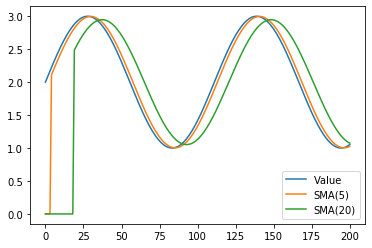

In [7]:
# Sine Wave Inputs
period = 111.0
amplitude = 2.0
sigma = 2.0
start = 0.0
end = 200.0
sineData = generateSineWave(period, amplitude, sigma, end)
calculateAndPlotSMA(sineData, 5, 20)

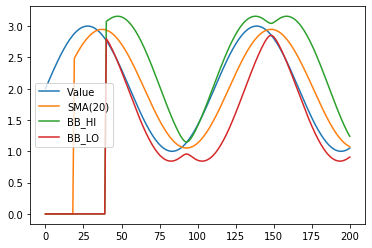

In [8]:
# plot bollinger bands using the sine wave data
plotBB(sineData, 20, 2)

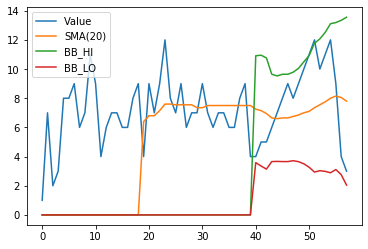

In [9]:
# Using some fictional data.
fictional_data = [1, 7, 2, 3, 8, 8, 9, 6, 7, 11, 9, 4, 6, 7, 7, 6, 6, 8, 9, 4, 
           9, 7, 9, 12, 8, 7, 9, 6, 7, 7, 9, 7, 6, 7, 7, 6, 6, 8, 9, 4,
           4, 5, 5, 6, 7, 8, 9, 8, 9, 10, 11, 12, 10, 11, 12, 9, 4, 3]

plotBB(fictional_data, 20, 2)

## Function Testing Suite

In [10]:
import unittest

class TestNotebook(unittest.TestCase):
    
    def test_variance(self):
        someData = [19, 23, 23, 17, 18, 32]
        otherData = [1, 1, 1, 2, 2, 2, 3, 3, 3]
        self.assertEqual(variance(someData), 30.4)
        self.assertEqual(variance(otherData),0.75)
        
    def test_stddev(self):
        someData = [19, 23, 23, 17, 18, 32]
        otherData = [1, 1, 1, 2, 2, 2, 3, 3, 3]
        self.assertAlmostEqual(stddev(someData), 5.5136195)
        self.assertAlmostEqual(stddev(otherData),0.8660254)
        
    def test_stddev_list(self):
        #stddev_list(data, period):
        someData = [1, 1, 1, 1,   2, 2, 2, 2,   3, 3, 3, 3,   2, 2, 2, 2,   1, 1, 1, 1]
        a_num = math.sqrt(1/3)
        long_data = stddev_list(someData,3)
        long_data_ans = [0,0,0,0,a_num,a_num,0,0,a_num,a_num,0,0,a_num,a_num,0,0,a_num,a_num,0,0]
        self.assertTrue(np.allclose(long_data, long_data_ans))
        
    def test_getBOL(self):
        someData = [1, 1, 1, 1,   2, 2, 2, 2,   3, 3, 3, 3,   2, 2, 2, 2,   1, 1, 1, 1]
        sma_bb, bolu, boll = getBOL(someData, 3, 1)
        sma_ans = getSMAlist(someData, 3)
        bolu_ans = [0, 0, 0, 0, 0, 0, 2.0, 2.0, 2.910683602522959, 3.2440169358562922, 
                    3.0, 3.0, 3.2440169358562922, 2.910683602522959, 2.0, 2.0, 
                    2.2440169358562922, 1.910683602522959, 1.0, 1.0]
        boll_ans = [0, 0, 0, 0, 0, 0, 2.0, 2.0, 1.7559830641437078, 2.089316397477041, 
                    3.0, 3.0, 2.089316397477041, 1.7559830641437078, 2.0, 2.0, 
                    1.089316397477041, 0.7559830641437075, 1.0, 1.0]
        self.assertTrue(np.allclose(sma_bb, sma_ans))
        self.assertTrue(np.allclose(bolu, bolu_ans))
        self.assertTrue(np.allclose(boll, boll_ans))
    
    
    ##### Simple Moving Average Function Tests #####
    
    def test_getSingleSMA(self):
        shortData = [10, 5, 8, 7]
        self.assertAlmostEqual(getSingleSMA(shortData, 3, 3), 6.66666666)
        self.assertEqual(getSingleSMA(shortData, 0, 1), 10.0)
        someData = [1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0]
        self.assertEqual(getSingleSMA(someData, 5, 4), 1.0)
        
    def test_getAvg(self):
        shortData = [10, 20]
        self.assertEqual(getAvg(shortData), 15.0)
        someData = [1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0]
        self.assertAlmostEqual(getAvg(someData), 0.7142857)
        
    def test_getSMAlist(self):
        someData = [1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0]
        self.assertEqual(getSMAlist(someData, 1), someData)
        self.assertEqual(getSMAlist(someData, 3),[0.0, 0.0, 1.0, 1.0, 1.0, 2/3, 1/3])
        self.assertEqual(getSMAlist(someData, 5),[0.0, 0.0, 0.0, 0.0, 0.8, 0.8, 0.8])
        
    def test_getMovingList(self):
        someData = [1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0]
        self.assertEqual(getMovingList(someData, 5, 4), [2.0, 1.0, 0.0, 1.0])
        
    def test_sineWave(self):
        sineWaveArray = generateSineWave(8, 2.0, 0.0, 8)
        self.assertAlmostEqual(sineWaveArray[2], 1.0)
        self.assertAlmostEqual(sineWaveArray[4], 0.0)
        self.assertAlmostEqual(sineWaveArray[6], -1.0)
        self.assertAlmostEqual(sineWaveArray[8], 0.0)

# Run the tests.
unittest.main(argv=[''], verbosity=1, exit=False)      

.........
----------------------------------------------------------------------
Ran 9 tests in 0.013s

OK


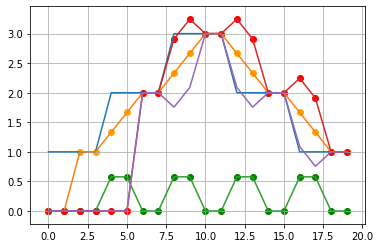

In [11]:
# Bollinger Band Function Test Visualized
someData = [1, 1, 1, 1,   2, 2, 2, 2,   3, 3, 3, 3,   2, 2, 2, 2,   1, 1, 1, 1]
sma = getSMAlist(someData, 3)
long_data = stddev_list(someData,3)
sma_bb, bolu, boll = getBOL(someData, 3, 1)
x = np.arange(len(someData))
plt.plot(x, someData)
plt.plot(x, sma)
plt.plot(x, long_data)
plt.plot(x, bolu)
plt.plot(x, boll)
plt.scatter(x, long_data, color='green')
plt.scatter(x, sma_bb, color='orange')
plt.scatter(x, bolu, color='r')
plt.grid()
plt.show()